In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%config InlineBackend.figure_formats = ['svg']
matplotlib.rcParams['figure.figsize'] = (6.0, 4.0)

# SGD for linear regression

In [15]:
xvec = torch.linspace(-3, 3, steps=100)
beta_true = torch.tensor([-3., 3])
n = len(xvec)
X = torch.stack((torch.ones(n), xvec), -1)
y = X @ beta_true + torch.randn(n)

In [16]:
print(X)
print(X.shape)

tensor([[ 1.0000, -3.0000],
        [ 1.0000, -2.9394],
        [ 1.0000, -2.8788],
        [ 1.0000, -2.8182],
        [ 1.0000, -2.7576],
        [ 1.0000, -2.6970],
        [ 1.0000, -2.6364],
        [ 1.0000, -2.5758],
        [ 1.0000, -2.5152],
        [ 1.0000, -2.4545],
        [ 1.0000, -2.3939],
        [ 1.0000, -2.3333],
        [ 1.0000, -2.2727],
        [ 1.0000, -2.2121],
        [ 1.0000, -2.1515],
        [ 1.0000, -2.0909],
        [ 1.0000, -2.0303],
        [ 1.0000, -1.9697],
        [ 1.0000, -1.9091],
        [ 1.0000, -1.8485],
        [ 1.0000, -1.7879],
        [ 1.0000, -1.7273],
        [ 1.0000, -1.6667],
        [ 1.0000, -1.6061],
        [ 1.0000, -1.5455],
        [ 1.0000, -1.4848],
        [ 1.0000, -1.4242],
        [ 1.0000, -1.3636],
        [ 1.0000, -1.3030],
        [ 1.0000, -1.2424],
        [ 1.0000, -1.1818],
        [ 1.0000, -1.1212],
        [ 1.0000, -1.0606],
        [ 1.0000, -1.0000],
        [ 1.0000, -0.9394],
        [ 1.0000, -0

In [17]:
print(y)
print(y.shape)

tensor([-12.7496, -10.7545, -11.4802, -11.0697, -12.2670, -12.2760, -11.2096,
        -11.0864, -11.3745,  -8.2696, -10.6258,  -9.9537,  -8.6003, -10.0645,
         -9.3456,  -8.5299,  -7.0895,  -8.4161,  -8.0936,  -8.3042,  -5.7178,
         -6.7849,  -9.1718,  -7.4094,  -7.3237,  -7.8610,  -7.7256,  -5.2116,
         -6.6129,  -7.5139,  -7.9298,  -6.5501,  -6.4172,  -5.3597,  -7.3958,
         -4.9590,  -3.4152,  -5.6185,  -6.7154,  -5.4439,  -4.1898,  -4.1682,
         -5.0641,  -3.8989,  -3.2341,  -6.9098,  -4.6216,  -3.0689,  -1.4776,
         -3.5705,  -3.8397,  -0.8319,  -1.8805,  -1.0941,  -3.0045,  -1.7409,
         -2.3767,  -2.8003,  -1.6146,  -2.3983,  -3.4193,  -1.0858,  -0.6750,
         -3.1383,  -1.0065,  -1.7498,  -0.0128,  -0.9156,  -0.1768,  -1.3290,
          0.2392,   1.5038,   1.1909,   0.7712,   2.3542,   1.6227,   3.3311,
          3.5955,   2.2301,   2.2463,   4.2081,   3.7154,   3.3775,   1.9539,
          3.5729,   2.4982,   4.1565,   2.5464,   4.9701,   4.45

In [18]:
def mse(yhat, y):
    """ Mean squared error loss """
    return torch.mean((yhat - y)**2)

def update(loss, lr=0.1):
    """ Update beta via gradient descent """
    # compute gradients
    loss.backward()
    
    # update the parameters
    with torch.no_grad():
        beta.sub_(lr * beta.grad)
        beta.grad.zero_()
        

In [6]:
beta_history = [] # weights
loss_history = []
beta = torch.nn.Parameter(torch.tensor((8, -8.)))

n_epochs = 30
idx = np.arange(n)

for epoch in range(n_epochs):
    np.random.shuffle(idx)
    
    # use one datapoint at a time to update parameters
    for i in idx:
        beta_history.append(beta.clone().detach())
        yhat = X[i, :] @ beta
        loss = mse(yhat, y[i])
        update(loss, lr=0.01)
        loss_history.append(loss.clone().detach())

# What did we learn?

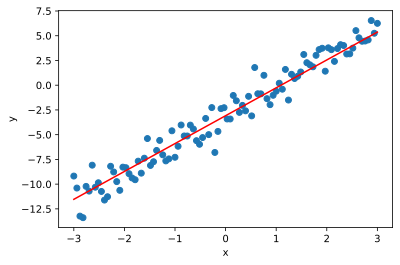

In [7]:
plt.scatter(xvec, y)
plt.plot(xvec, X @ beta.detach().numpy(), c="r")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## What happened to our loss?

In [22]:
print(loss_history)

[tensor(219.1458), tensor(82.1152), tensor(5.0932), tensor(119.2286), tensor(936.0770), tensor(174.3824), tensor(203.9852), tensor(442.4637), tensor(99.3735), tensor(224.9613), tensor(601.7364), tensor(37.9150), tensor(127.1493), tensor(341.4651), tensor(289.8175), tensor(474.1962), tensor(293.7725), tensor(31.5176), tensor(23.7315), tensor(70.8874), tensor(0.1143), tensor(2.1941), tensor(7.2982), tensor(5.4218), tensor(0.0820), tensor(132.3652), tensor(11.4401), tensor(0.4756), tensor(76.6293), tensor(0.0993), tensor(0.5193), tensor(131.3744), tensor(214.8370), tensor(78.8301), tensor(49.2438), tensor(9.3656), tensor(9.6252), tensor(19.9437), tensor(44.0712), tensor(32.0077), tensor(43.8774), tensor(64.1498), tensor(17.5000), tensor(31.1617), tensor(40.2372), tensor(20.1076), tensor(10.6104), tensor(24.7352), tensor(21.0891), tensor(32.4629), tensor(6.9741), tensor(17.1332), tensor(11.3172), tensor(8.7330), tensor(62.6884), tensor(13.6038), tensor(6.2932), tensor(10.5392), tensor(16.5

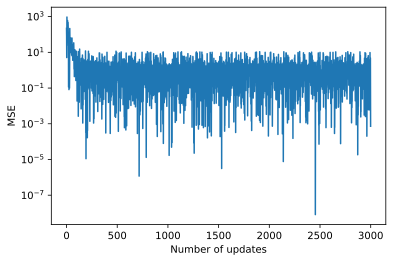

In [23]:
plt.plot(loss_history)
plt.xlabel("Number of updates")
plt.ylabel("MSE")
plt.yscale("log")
plt.show()

# Visualizing the SGD trajectory

In [9]:
beta1_grid = torch.linspace(-10, 10, steps=100)
beta2_grid = torch.linspace(-10, 10, steps=100)
loss_grid = torch.zeros((len(beta1_grid), len(beta1_grid)))

for i, beta1 in enumerate(beta1_grid):
    for j, beta2 in enumerate(beta2_grid):
        beta_vec = torch.stack((beta1_grid[i], 
                                beta2_grid[j]),
                               -1)
        yhat = X @ beta_vec
        loss_grid[j, i] = torch.log(mse(yhat, y))

def plot_surface(beta_history):
    fig, ax = plt.subplots()
    CS = ax.contour(beta1_grid.numpy(), 
                    beta2_grid.numpy(), 
                    loss_grid.numpy(), 
                    20)
    ax.clabel(CS, inline=1, fontsize=10)
    ax.set_title('MSE loss surface')

    beta_history = np.stack(beta_history, 0)
    ax.scatter(beta_history[:, 0], beta_history[:, 1], c="k")
    ax.plot(beta_history[:, 0], beta_history[:, 1], c="r")
    
    plt.xlabel("beta_1 (intercept)")
    plt.ylabel("beta_2 (slope)")
    plt.show()

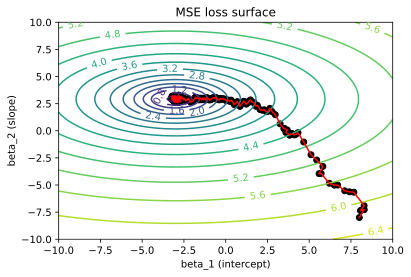

In [10]:
plot_surface(beta_history)

# Recap

### Gradient descent

- Uses all of the data at once
- Is slow

### Stochastic gradient descent

- Uses one datapoint at a time
- Is noisy

In [20]:
print(n)

100
